# IMPORTING PYTHON PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# IMPORTING DATASET

In [2]:
df_bike=pd.read_csv('hour.csv',parse_dates=['dteday'])
df_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


We may choose to drop column 1.

In [3]:
df_bike.drop(df_bike.columns[[1]],axis=1,inplace=True)
df_bike

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# EXPLORATORY DATA ANALYSIS

In [4]:
df_bike.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df_bike.tail()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [6]:
df_bike.shape

(17379, 16)

In [7]:
df_bike.dtypes

instant         int64
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
df_bike.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
instant       17379 non-null int64
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12)
memory usage: 2.1 MB


In [10]:
df_bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Data in the columns 'casual' and 'registered' does not appear to have normal distribution. Data in all other columns appear to have normal distribution (mean very close to 50th percentile).

In [11]:
#sns.heatmap(df_bike.isnull(),annot=True)

In [12]:
df_bike.isnull().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

CHECKING DATA SKEWNESS

In [13]:
df_bike.skew()

instant       0.000000
season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    1.228047
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.574905
casual        2.499237
registered    1.557904
cnt           1.277412
dtype: float64

REMOVING DATA SKEWNESS

In [14]:
for col in df_bike.columns:
    if df_bike.skew().loc[col]>0.55:
        df_bike[col]=np.log1p(df_bike[col])
df_bike.skew()

instant       0.000000
season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    0.996837
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.263926
casual       -0.230087
registered   -0.819644
cnt          -0.818180
dtype: float64

CHECKING OUTLIERS

In [15]:
z=np.abs(zscore(df_bike))
print(z.shape)
print(np.where(z>3))

(17379, 16)
(array([    6,   210,   372,   373,   374,   375,   376,   377,   378,
         379,   380,   381,   382,   383,   384,   385,   386,   387,
         388,   389,   390,   391,   392,   393,   394,   395,   585,
         598,   713,  1007,  1009,  1010,  1014,  1017,  1018,  1119,
        1123,  1124,  1125,  1126,  1127,  1157,  1158,  1159,  1160,
        1161,  1161,  1162,  1163,  1164,  1165,  1166,  1167,  1168,
        1169,  1170,  1171,  1172,  1173,  1174,  1175,  1176,  1177,
        1178,  1179,  1180,  1258,  1259,  1261,  1264,  1332,  1333,
        1365,  1413,  1477,  1483,  1505,  1551,  1551,  1552,  1553,
        1554,  1555,  1556,  1557,  1558,  1559,  1560,  1561,  1562,
        1563,  1564,  1565,  1566,  1567,  1568,  1569,  1570,  1571,
        1572,  1873,  1880,  2023,  2119,  2142,  2156,  2402,  2403,
        2404,  2405,  2406,  2407,  2408,  2409,  2410,  2411,  2412,
        2413,  2414,  2415,  2416,  2417,  2418,  2419,  2420,  2421,
       

REMOVING OUTLIERS

In [16]:
df_final=df_bike.loc[(z<3).all(axis=1)]
print(df_final.shape)

(16768, 16)


BOXPLOT

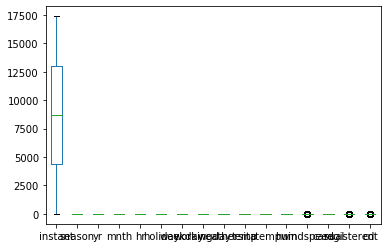

In [17]:
df_final.plot.box()

CORRELATION

In [18]:
df_final.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404918,0.867194,0.486724,-0.005168,NaN,0.003190,0.002055,-0.000436,0.137162,0.137855,0.000497,-0.069484,0.154417,0.211642,0.203113
season,0.404918,1.000000,-0.011690,0.836446,-0.005214,NaN,-0.010637,0.012535,-0.006130,0.308725,0.315388,0.141877,-0.135389,0.181411,0.157004,0.162738
yr,0.867194,-0.011690,1.000000,-0.010889,-0.004706,NaN,0.000061,0.000641,-0.008481,0.042096,0.040021,-0.089368,-0.008953,0.109691,0.177223,0.166868
mnth,0.486724,0.836446,-0.010889,1.000000,-0.005084,NaN,0.006431,0.002589,0.014152,0.201638,0.207303,0.157290,-0.125400,0.118038,0.114166,0.115295
hr,-0.005168,-0.005214,-0.004706,-0.005084,1.000000,NaN,-0.004086,0.002465,-0.030307,0.137499,0.133611,-0.279923,0.134724,0.487484,0.568829,0.566907
holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,0.003190,-0.010637,0.000061,0.006431,-0.004086,NaN,1.000000,0.011453,0.006439,-0.000615,-0.008929,-0.033099,0.011369,0.016614,0.031430,0.028252
workingday,0.002055,0.012535,0.000641,0.002589,0.002465,NaN,0.011453,1.000000,0.041036,0.050613,0.048619,0.014820,-0.009416,-0.189340,0.045554,-0.000930
weathersit,-0.000436,-0.006130,-0.008481,0.014152,-0.030307,NaN,0.006439,0.041036,1.000000,-0.102574,-0.104744,0.432522,0.013275,-0.163207,-0.101082,-0.114329
temp,0.137162,0.308725,0.042096,0.201638,0.137499,NaN,-0.000615,0.050613,-0.102574,1.000000,0.987487,-0.079319,-0.010128,0.554778,0.341923,0.383664


PAIRPLOT

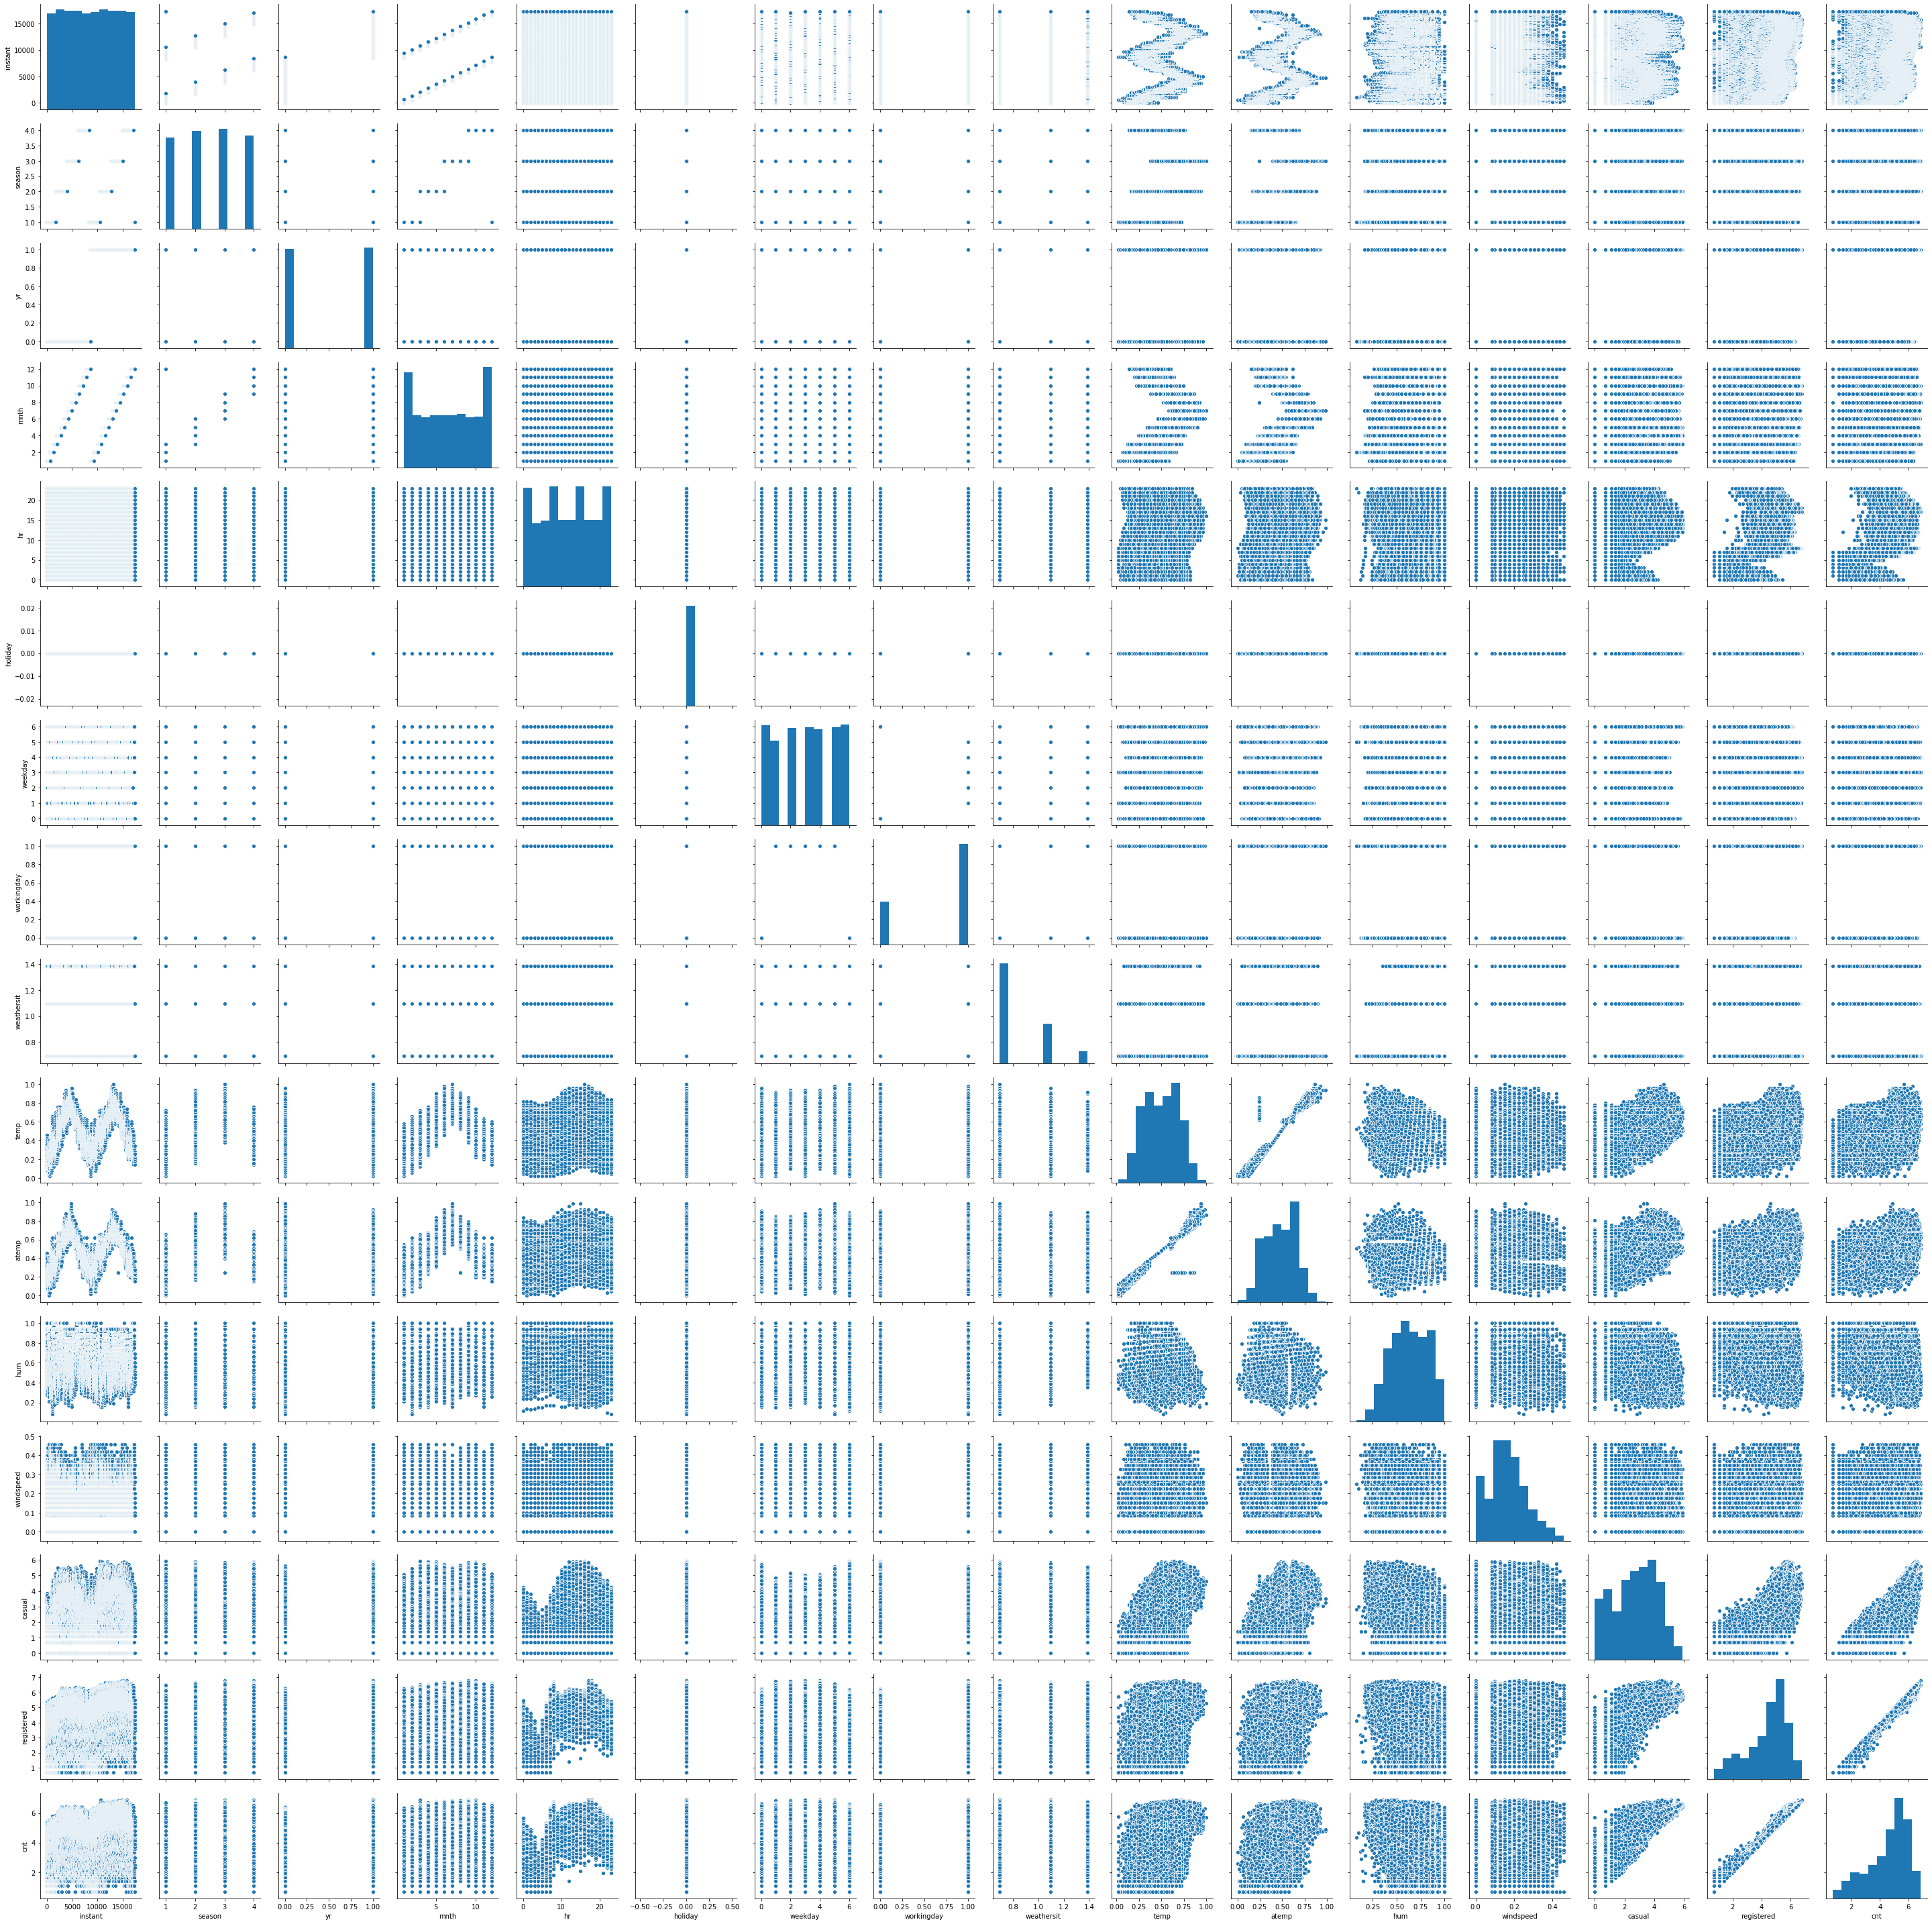

In [19]:
sns.pairplot(df_final)

# TRAIN AND TEST DATA

In [20]:
df_x=df_final.iloc[:,:-1]
print(df_x)
y=df_final.iloc[:,-1]
print(y)
print()
print(df_x.shape)
print(y.shape)

       instant  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1       1   0     1   0      0.0        6           0   
1            2       1   0     1   1      0.0        6           0   
2            3       1   0     1   2      0.0        6           0   
3            4       1   0     1   3      0.0        6           0   
4            5       1   0     1   4      0.0        6           0   
...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375       1   1    12  19      0.0        1           1   
17375    17376       1   1    12  20      0.0        1           1   
17376    17377       1   1    12  21      0.0        1           1   
17377    17378       1   1    12  22      0.0        1           1   
17378    17379       1   1    12  23      0.0        1           1   

       weathersit  temp   atemp   hum  windspeed    casual  registered  
0        0.693147  0.24  0.2879  0.81   0.000000  1.386294    2.639057  
1        0.69

In [21]:
x=df_x

# TRAINING AND TESTING - VARIOUS MODELS

FUNCTION DECLARATION

In [22]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("R2 Score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("Maximum R2 Score corresponds to ",final_r_state," is ",max_r_score)
    return(final_r_state)

LOGISTIC REGRESSION

In [23]:
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

R2 Score corresponding to  42  is  0.9969321395938467
R2 Score corresponding to  43  is  0.9971602731970263
R2 Score corresponding to  44  is  0.9967900764969732
R2 Score corresponding to  45  is  0.9968874023487206
R2 Score corresponding to  46  is  0.9970987337560472
R2 Score corresponding to  47  is  0.9967726233499968
R2 Score corresponding to  48  is  0.996905055638984
R2 Score corresponding to  49  is  0.9968191617807238
R2 Score corresponding to  50  is  0.9970532470950259
R2 Score corresponding to  51  is  0.9967260482135395
R2 Score corresponding to  52  is  0.9970798817783525
R2 Score corresponding to  53  is  0.9966157770705767
R2 Score corresponding to  54  is  0.9971631282699629
R2 Score corresponding to  55  is  0.9969690263018176
R2 Score corresponding to  56  is  0.9969958684541116
R2 Score corresponding to  57  is  0.9968779482067519
R2 Score corresponding to  58  is  0.9967055768033279
R2 Score corresponding to  59  is  0.9972179730656379
R2 Score corresponding to  60

In [24]:
print("Mean R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean())
print("Standard Deviation in R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').std())

Mean R2 Score for Linear Regression is  0.9964300328926268
Standard Deviation in R2 Score for Linear Regression is  0.0011694872112567641


KNEIGHBORS REGRESSOR

In [25]:
neighbors={"n_neighbors":range(1,10)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 9}

In [26]:
knr=KNeighborsRegressor(n_neighbors=9)
r_state=maxr2_score(knr,x,y)

R2 Score corresponding to  42  is  0.4122362159477547
R2 Score corresponding to  43  is  0.428003237664055
R2 Score corresponding to  44  is  0.4353297219260879
R2 Score corresponding to  45  is  0.4056242786602563
R2 Score corresponding to  46  is  0.44151874944435143
R2 Score corresponding to  47  is  0.4139962246321576
R2 Score corresponding to  48  is  0.4058889588739867
R2 Score corresponding to  49  is  0.43490343626839
R2 Score corresponding to  50  is  0.4177099036061669
R2 Score corresponding to  51  is  0.4048513342130582
R2 Score corresponding to  52  is  0.42306491021037707
R2 Score corresponding to  53  is  0.3915332115958434
R2 Score corresponding to  54  is  0.43453464108470463
R2 Score corresponding to  55  is  0.40645969691550965
R2 Score corresponding to  56  is  0.4046583118563004
R2 Score corresponding to  57  is  0.41830623705810377
R2 Score corresponding to  58  is  0.44467367787267564
R2 Score corresponding to  59  is  0.4198080095285952
R2 Score corresponding to

In [27]:
print("Mean R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean R2 Score for KNN Regression is  -0.37724738655368034
Standard Deviation in R2 Score for KNN Regression is  0.24905516830222713


LASSO REGRESSION

In [28]:
ls=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(ls,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [29]:
ls=Lasso(alpha=0.001)
r_state=maxr2_score(ls,x,y)

R2 Score corresponding to  42  is  0.9969052843677719
R2 Score corresponding to  43  is  0.9971284247189264
R2 Score corresponding to  44  is  0.9967673212846067
R2 Score corresponding to  45  is  0.9968615886551538
R2 Score corresponding to  46  is  0.9970755231539093
R2 Score corresponding to  47  is  0.9967321257144444
R2 Score corresponding to  48  is  0.9968842859158454
R2 Score corresponding to  49  is  0.9967908982282154
R2 Score corresponding to  50  is  0.9970403288361752
R2 Score corresponding to  51  is  0.9967135640216055
R2 Score corresponding to  52  is  0.9970596658440019
R2 Score corresponding to  53  is  0.9965966289644917
R2 Score corresponding to  54  is  0.9971481463849956
R2 Score corresponding to  55  is  0.9969442842216159
R2 Score corresponding to  56  is  0.9969625477718962
R2 Score corresponding to  57  is  0.9968580341352403
R2 Score corresponding to  58  is  0.9966888156320369
R2 Score corresponding to  59  is  0.9972162721287656
R2 Score corresponding to  6

In [30]:
print("Mean R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Lasso Regression is  0.9964104003575514
Standard Deviation in R2 Score for Lasso Regression is  0.0011709419296296463


RIDGE REGRESSION

In [31]:
rd=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rd,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [32]:
rd=Ridge(alpha=1)
r_state=maxr2_score(rd,x,y)

R2 Score corresponding to  42  is  0.9969320799193114
R2 Score corresponding to  43  is  0.9971599815579409
R2 Score corresponding to  44  is  0.9967901824478289
R2 Score corresponding to  45  is  0.9968872702644852
R2 Score corresponding to  46  is  0.997098224053526
R2 Score corresponding to  47  is  0.9967727437898076
R2 Score corresponding to  48  is  0.9969048197152176
R2 Score corresponding to  49  is  0.9968195903417579
R2 Score corresponding to  50  is  0.9970533569425015
R2 Score corresponding to  51  is  0.9967260876506255
R2 Score corresponding to  52  is  0.9970797058567878
R2 Score corresponding to  53  is  0.99661586171163
R2 Score corresponding to  54  is  0.9971630095359839
R2 Score corresponding to  55  is  0.996969156491164
R2 Score corresponding to  56  is  0.9969954842836564
R2 Score corresponding to  57  is  0.9968782938216465
R2 Score corresponding to  58  is  0.9967059597901508
R2 Score corresponding to  59  is  0.9972181366527009
R2 Score corresponding to  60  i

In [33]:
print("Mean R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Ridge Regression is  0.996430220363506
Standard Deviation in R2 Score for Ridge Regression is  0.0011697775192819203


ELASTIC NET REGRESSION

In [34]:
enr=ElasticNet()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(enr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [35]:
enr=ElasticNet(alpha=0.001)
r_state=maxr2_score(enr,x,y)

R2 Score corresponding to  42  is  0.9969148787029387
R2 Score corresponding to  43  is  0.997140953223606
R2 Score corresponding to  44  is  0.9967777932939988
R2 Score corresponding to  45  is  0.9968721611699524
R2 Score corresponding to  46  is  0.9970859968591674
R2 Score corresponding to  47  is  0.996744653240636
R2 Score corresponding to  48  is  0.9968943852589126
R2 Score corresponding to  49  is  0.9968037188420749
R2 Score corresponding to  50  is  0.9970496242045708
R2 Score corresponding to  51  is  0.996723086465065
R2 Score corresponding to  52  is  0.9970700649514993
R2 Score corresponding to  53  is  0.9966047936632976
R2 Score corresponding to  54  is  0.9971581418639534
R2 Score corresponding to  55  is  0.9969573044092799
R2 Score corresponding to  56  is  0.9969729137988996
R2 Score corresponding to  57  is  0.996871712637484
R2 Score corresponding to  58  is  0.9966989013980369
R2 Score corresponding to  59  is  0.9972231176369938
R2 Score corresponding to  60  i

In [36]:
print("Mean R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Elastic Net Regression is  0.99641646222461
Standard Deviation in R2 Score for Elastic Net Regression is  0.0011716844946627898


GRADIENT BOOSTING REGRESSOR

In [37]:
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [38]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000)
r_state=maxr2_score(gbr,x,y)

R2 Score corresponding to  42  is  0.9999628807022485
R2 Score corresponding to  43  is  0.9999528799595784
R2 Score corresponding to  44  is  0.9999581626035935
R2 Score corresponding to  45  is  0.9999541541640553
R2 Score corresponding to  46  is  0.999958557961658
R2 Score corresponding to  47  is  0.9999575584560487
R2 Score corresponding to  48  is  0.9999621423863243
R2 Score corresponding to  49  is  0.9999545748353457
R2 Score corresponding to  50  is  0.9999558353341192
R2 Score corresponding to  51  is  0.9999623197249567
R2 Score corresponding to  52  is  0.999961289890776
R2 Score corresponding to  53  is  0.9999575954330626
R2 Score corresponding to  54  is  0.9999531192083498
R2 Score corresponding to  55  is  0.9999567596865307
R2 Score corresponding to  56  is  0.9999611902922622
R2 Score corresponding to  57  is  0.9999568546151643
R2 Score corresponding to  58  is  0.9999587627986336
R2 Score corresponding to  59  is  0.9999634798961033
R2 Score corresponding to  60 

In [39]:
print("Mean R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Gradient Boosting Regressor is  0.9999397788217971
Standard Deviation in R2 Score for Gradient Boosting Regressor is  1.4634696098129927e-05


# BEST MODEL

R2 SCORE AND RMSE

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=64,test_size=0.20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print("R2 Score is ",r2_score(y_test,y_pred))
print("RMSE is ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score is  0.9997261923311488
RMSE is  0.023599418812353327


CROSS VALIDATION

In [41]:
score=cross_val_score(gbr,x,y,cv=5)
print('Score is ',score)
print('Mean Score is ', score.mean())
print('Standard Deviation is ',score.std())

Score is  [0.99933043 0.99946326 0.99966312 0.99967997 0.99966762]
Mean Score is  0.9995608799902147
Standard Deviation is  0.00014047600673125659


# PICKLE 

In [42]:
joblib.dump(gbr,'bike.pkl')

['bike.pkl']